# ML 와인 과제
- feature를 넣으면 몇 등급짜리 와인입니다~ 알려주기
- predict할 때 input 사용하기

전 이렇게 세분화했습니다
1. 데이터 전처리(중복값 제거, feature 2개 정하기)
2. 데이터 정규화
3. KNN 모델 분석
4. 튜닝 후 => 최적의 파라미터 결과 분석

## 1. 모듈 로딩 & 데이터 준비

In [45]:
import pandas as pd # 데이터 파일 처리 관련 모듈 
from sklearn.neighbors import KNeighborsClassifier # 기계학습 관련 모듈 
import matplotlib.pyplot as plt # 그래프

In [54]:
data_file = "../data/winequality-white.csv"
wineDF = pd.read_csv(data_file, delimiter=";") 
wineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 데이터 준비
- 학습(train)
- 검증(val)
    - 학습 + 검증 = 80%
- 테스트(test)
    - 테스트 = 20% 

In [56]:
wineDF.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


> alcohol	sugar	pH 선택!!

In [115]:
#quality_list = wineDF.quality.unique()
#wineDF.quality.value_counts().plot.hist() # 3~9

In [117]:
DF = wineDF[["alcohol", "residual sugar", "pH", "quality"]]
DF

,alcohol,residual sugar,pH,quality
0,8.8,20.7,3.00,6
1,9.5,1.6,3.30,6
2,10.1,6.9,3.26,6
3,9.9,8.5,3.19,6
4,9.9,8.5,3.19,6
...,...,...,...,...
4893,11.2,1.6,3.27,6
4894,9.6,8.0,3.15,5
4895,9.4,1.2,2.99,6
4896,12.8,1.1,3.34,7


In [157]:
DF.describe()

,alcohol,residual sugar,pH,quality
count,4898.000000,4898.000000,4898.000000,4898.000000
mean,10.514267,6.391415,3.188267,5.877909
std,1.230621,5.072058,0.151001,0.885639
min,8.000000,0.600000,2.720000,3.000000
25%,9.500000,1.700000,3.090000,5.000000
50%,10.400000,5.200000,3.180000,6.000000
75%,11.400000,9.900000,3.280000,6.000000
max,14.200000,65.800000,3.820000,9.000000


In [74]:
from sklearn.model_selection import train_test_split

In [118]:
# train, test = 8 : 2
featureDF = DF.iloc[:, :-1]
targetSR = DF["quality"]
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetSR, test_size=0.2, stratify = targetSR) # target의 비율에 맞게 분리해달라

In [119]:
#검중용 데이터셋 준비
X_train, X_val, Y_train, Y_val=train_test_split(X_train,Y_train,test_size=0.1,stratify=Y_train)

In [120]:
# 학습 및 테스트 데이터 셋 확인 
print(f"학습용 데이터셋 ---> \n{X_train.shape}, {Y_train.shape}")
print()
print(f"학습용 데이터셋 비율 ---> \n{Y_train.value_counts()/Y_train.shape[0]}")
print()
print(f"테스트용 데이터셋 ---> \n{X_test.shape}, {Y_test.shape}")
print()
print(f"테스트용 데이터셋 비율 ---> \n{Y_test.value_counts()/Y_test.shape[0]}")

학습용 데이터셋 ---> 
(3526, 3), (3526,)

학습용 데이터셋 비율 ---> 
quality
6    0.448667
5    0.297504
7    0.179807
8    0.035735
4    0.033182
3    0.003971
9    0.001134
Name: count, dtype: float64

테스트용 데이터셋 ---> 
(980, 3), (980,)

테스트용 데이터셋 비율 ---> 
quality
6    0.448980
5    0.296939
7    0.179592
8    0.035714
4    0.033673
3    0.004082
9    0.001020
Name: count, dtype: float64


## 데이터 스케일링

In [121]:
# 모듈로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # 정규 분포, minmax, robust

In [122]:
scaler = StandardScaler()

In [123]:
scaler.fit(X_train) 

StandardScaler()

In [124]:
scaler.mean_

array([10.52582246,  6.37076007,  3.1883806 ])

In [125]:
# train 데이터 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape
# fit_transform도 있지만 우리는 학습용 데이터의 값을 테스트에 적용시켜야해서 한번에 하면 안됨 

(3526, 3)

In [127]:
# val 데이터 스케일링
scaled_X_val = scaler.transform(X_val)
scaled_X_val.shape

(392, 3)

In [128]:
# test 데이터 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(980, 3)

##  4. 학습

In [139]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(scaled_X_train, Y_train)

print(lr.score(scaled_X_train, Y_train))
print(lr.score(scaled_X_test, Y_test))

0.5011344299489506
0.5


In [142]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(scaled_X_train, Y_train)

print(dt.score(scaled_X_train, Y_train))
print(dt.score(scaled_X_test, Y_test))

0.9934770277935338
0.5571428571428572


In [155]:
dt = DecisionTreeClassifier(max_depth=25, random_state=42)
dt.fit(scaled_X_train, Y_train)


print(dt.score(scaled_X_train, Y_train))
print(dt.score(scaled_X_test, Y_test))

0.9934770277935338
0.560204081632653


In [156]:
print(dt.feature_importances_)

[0.28509259 0.37282708 0.34208033]


In [174]:
# 모델 성능 좌우하는 매개변수 : 하이퍼파라미터
# KNN의 하이퍼파라미터 : n_neighbors -> 1 ~ 전체 데이터 수
max_k = scaled_X_train.shape[0]
test_scoreList = []
train_scoreList = []
for k in range(1,100,10):
    
    model =  KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, Y_train)
    
    test_scoreList.append(model.score(scaled_X_train, Y_train))
    train_scoreList.append(model.score(scaled_X_test, Y_test))

In [169]:
# 학습 및 테스트 데이터에 대한 점수 확인
print(f"Train Score : {test_scoreList}")
print(f"Test Score : {train_scoreList}")

Train Score : [0.9931934203062961, 0.5127623369256948, 0.5062393647192286, 0.4931934203062961, 0.49801474758933634, 0.4951786727169597, 0.49659671015314805, 0.49886557005104937, 0.49347702779353375, 0.49574588769143507]
Test Score : [0.5816326530612245, 0.503061224489796, 0.49081632653061225, 0.48367346938775513, 0.47551020408163264, 0.4806122448979592, 0.47244897959183674, 0.47346938775510206, 0.46938775510204084, 0.46530612244897956]


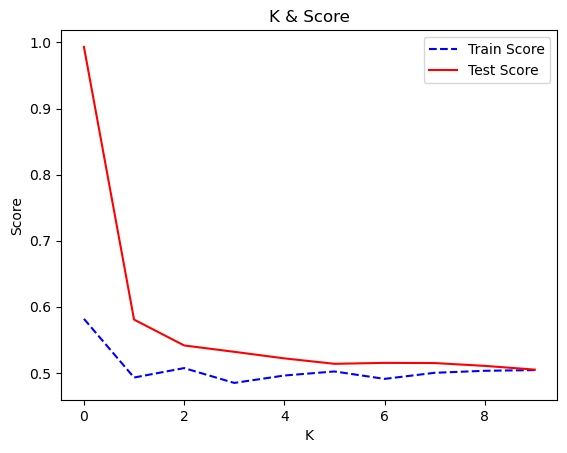

In [175]:
# K 갯수에  따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, "b--", label = "Train Score")
plt.plot(test_scoreList, "r-", label = "Test Score")
plt.title("K & Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.show()

In [136]:
model =  KNeighborsClassifier(n_neighbors=5)
model

KNeighborsClassifier()

In [137]:
model.fit(scaled_X_train, Y_train)

KNeighborsClassifier()

## 검증 진행 (val data)

In [138]:
model.score(scaled_X_val, Y_val) # 값이 이상하다...

0.45663265306122447

## 예측

In [160]:
model.predict(scaled_X_test) # 값이 이상하다...

array([7, 6, 5, 6, 6, 6, 6, 6, 7, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 5, 6,
       5, 6, 5, 5, 5, 7, 5, 5, 5, 5, 6, 7, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 7, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 7,
       5, 6, 8, 5, 6, 5, 6, 6, 6, 6, 7, 7, 6, 7, 6, 6, 6, 6, 6, 6, 5, 5,
       7, 6, 5, 6, 5, 5, 6, 5, 7, 7, 6, 7, 5, 7, 6, 5, 5, 6, 5, 8, 6, 7,
       7, 6, 6, 6, 6, 6, 5, 5, 6, 5, 7, 6, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5,
       5, 7, 6, 5, 6, 6, 5, 5, 7, 5, 6, 6, 6, 6, 5, 7, 4, 7, 6, 6, 6, 5,
       6, 7, 6, 7, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       5, 6, 5, 6, 6, 7, 5, 5, 6, 6, 5, 7, 6, 7, 6, 6, 5, 5, 5, 5, 5, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 7, 6, 5, 5, 6, 7, 5, 6, 6, 6, 6,
       5, 5, 6, 5, 5, 7, 6, 7, 6, 7, 6, 5, 6, 7, 6, 6, 6, 7, 5, 5, 6, 5,
       4, 7, 6, 5, 7, 6, 5, 7, 6, 5, 6, 5, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 7, 5,
       5, 6, 6, 7, 6, 7, 6, 6, 6, 5, 7, 5, 5, 6, 5,

In [162]:
a, b, c = map(int, input("값을 넣으세여 (alcohol, residual sugar, pH) : ").split(","))
# alcohol	residual sugar	pH	
new_data = pd.DataFrame([[a, b, c]], columns = DF.columns[:-1])
new_data

값을 넣으세여 (alcohol, residual sugar, pH) :  10, 7, 3


,alcohol,residual sugar,pH
0,10,7,3


In [163]:
scaled_new_data = scaler.transform(new_data)
scaled_new_data

array([[-0.42306537,  0.12347647, -1.24668924]])

In [166]:
model.predict(scaled_new_data)

array([6], dtype=int64)